In [14]:
#Set working directory (windows). Data assumed to be in a '\Data' subfolder
directory_path = r'C:\Users\YourFilePathHere\Python\Avengers'

#Set whether to save charts to an output subfolder in the above
save_charts=False


In [16]:
# Import the standard libraries
import os #File management library
import pandas as pd #Python Data Analysis 
import numpy as np #Numeric and Scientific Computation
import matplotlib #Visualisation
import matplotlib.pyplot as plt 
import matplotlib.ticker as mtick

#Import project relevant libraries
#None

#Global Matplotlib styles
%matplotlib inline
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({'font.family': 'calibri'})
plt.rcParams.update({'font.size': 14})
plt.rcParams.update({'figure.titlesize': 24})
plt.rcParams.update({'figure.titleweight': 'bold'})
plt.rcParams.update({'axes.linewidth': 0.8})
plt.rcParams.update({'axes.titlesize': 20})
plt.rcParams.update({'axes.titleweight': 'bold'})
plt.rcParams.update({'axes.facecolor': 'none'})
plt.rcParams.update({'axes.edgecolor': '#b0b0b0'})
plt.rcParams.update({'axes.axisbelow': True,})
plt.rcParams.update({'axes.spines.bottom': False})
plt.rcParams.update({'axes.spines.left': False})
plt.rcParams.update({'axes.spines.top': False})
plt.rcParams.update({'axes.spines.right': False})
plt.rcParams.update({'axes.grid': True})
plt.rcParams.update({'axes.grid.axis': 'y',})
plt.rcParams.update({'axes.labelcolor': '#202020'})
plt.rcParams.update({'axes.labelpad': 10.0})
plt.rcParams.update({'xtick.major.pad': 4.0})
plt.rcParams.update({'ytick.major.pad': 4.0})
plt.rcParams.update({'xtick.color': '#202020'})
plt.rcParams.update({'ytick.color': '#202020'})
plt.rcParams.update({'xtick.bottom': False})
plt.rcParams.update({'ytick.left': False})

#plt.rcParams.update({})

In [17]:
#plt.rcParams.update #check list of parameters

In [18]:

#load input data
filenames = os.listdir(directory_path+'\\Data')
print('Datasets loaded:')
for name in filenames:
    globals()[name.replace('.csv','')]= pd.read_csv(directory_path+'\\Data\\'+name)
    print(name.replace('.csv',''))

Datasets loaded:
avengers
avengers_screentime
avengers_screentime2
script_captain_america_all
script_captain_america_civil_war
script_captain_america_the_first_avenger
script_captain_america_the_winter_soldier


In [19]:
#check data
df = pd.DataFrame(avengers)
df.head()

,phase,hero,film,release_date,us_ca_box_office,row_box_office,total_box_office,budget,rotten_tomatoes,metacritic
0,Phase 1,Iron Man,Iron Man,02/05/2008,318412101,266762121,585174222,140000000,93,79
1,Phase 1,Incredible Hulk,The Incredible Hulk,13/06/2008,134806913,128620638,263427551,150000000,67,61
2,Phase 1,Iron Man,Iron Man 2,07/05/2010,312433331,311500000,623933331,200000000,73,57
3,Phase 1,Thor,Thor,06/05/2011,181030624,268295994,449326618,150000000,77,57
4,Phase 1,Captain America,Captain America: The First Avenger,22/07/2011,176654505,193915269,370569774,140000000,80,66


In [20]:
#Data cleaning

#Fix release date
df['release_date'] = pd.to_datetime(df['release_date'], dayfirst=True)

#Add Estimated ROI based on 3x production budget
df['roi']=(df['total_box_office']/(df['budget']*3))*100-100

#Add film number in sequal/overall MCU
df['sequel']=df.groupby(['hero'])['release_date'].rank(ascending=True).astype(int)
df['series']=df['release_date'].rank(ascending=True).astype(int)

#Add colors - uses material design for color choices https://www.materialui.co/colors
df.loc[ df.hero == 'Iron Man', 'color' ] = '#f44336'
df.loc[ df.hero == 'Incredible Hulk', 'color' ] = '#4CAF50'
df.loc[ df.hero == 'Thor', 'color' ] = '#FDD835'
df.loc[ df.hero == 'Captain America', 'color' ] = '#3949AB'
df.loc[ df.hero == 'Avengers', 'color' ] = '#607D8B'
df.loc[ df.hero == 'Guardians of the Galaxy', 'color' ] = '#FF9800'
df.loc[ df.hero == 'Ant-Man', 'color' ] = '#BDBDBD'
df.loc[ df.hero == 'Doctor Strange', 'color' ] = '#673AB7'
df.loc[ df.hero == 'Spiderman', 'color' ] = '#E91E63'
df.loc[ df.hero == 'Black Panther', 'color' ] = '#424242'

#Check Data Again
df.head()


,phase,hero,film,release_date,us_ca_box_office,row_box_office,total_box_office,budget,rotten_tomatoes,metacritic,roi,sequel,series,color
0,Phase 1,Iron Man,Iron Man,2008-05-02,318412101,266762121,585174222,140000000,93,79,39.327196,1,1,#f44336
1,Phase 1,Incredible Hulk,The Incredible Hulk,2008-06-13,134806913,128620638,263427551,150000000,67,61,-41.460544,1,2,#4CAF50
2,Phase 1,Iron Man,Iron Man 2,2010-05-07,312433331,311500000,623933331,200000000,73,57,3.988889,2,3,#f44336
3,Phase 1,Thor,Thor,2011-05-06,181030624,268295994,449326618,150000000,77,57,-0.149640,1,4,#FDD835
4,Phase 1,Captain America,Captain America: The First Avenger,2011-07-22,176654505,193915269,370569774,140000000,80,66,-11.769101,1,5,#3949AB


In [21]:
#Define functions for things used multiple times in charts
#Main title
def my_title(title,subtitle):
    fig.text(x = 0, y = 1
             , s = title
             , fontsize = 26, weight = 'bold', transform=fig.transFigure, color='#212121')
    fig.text(x = 0, y = 0.96, 
               s = subtitle
              ,color='#424242' ,fontsize = 20, transform=fig.transFigure)

#Subtitle
def my_signature(source):
    signature_line = matplotlib.lines.Line2D([0, 1], [0.025,0.025],
               transform=fig.transFigure, figure=fig, lw=2,color='#b0b0b0')
    fig.lines.extend([signature_line])
    fig.text(x = 0, y = 0, transform=fig.transFigure,
        s = 'James Tuck',
        fontsize = 14, color = '#757575')
    fig.text(x = 1, y = 0, transform=fig.transFigure,
        s = 'Source: ' + source,
        fontsize = 14, color = '#757575', horizontalalignment='right')

#Save Chart (& create subfolder if necessary)
def save_chart(chart_name):
    if save_charts:
        if not os.path.exists(directory_path+'\\Outputs'):
            os.makedirs(directory_path+'\\Outputs')
        plt.savefig(directory_path+'\\Outputs\\' + chart_name + '.png', format='png', dpi=250, bbox_inches='tight')

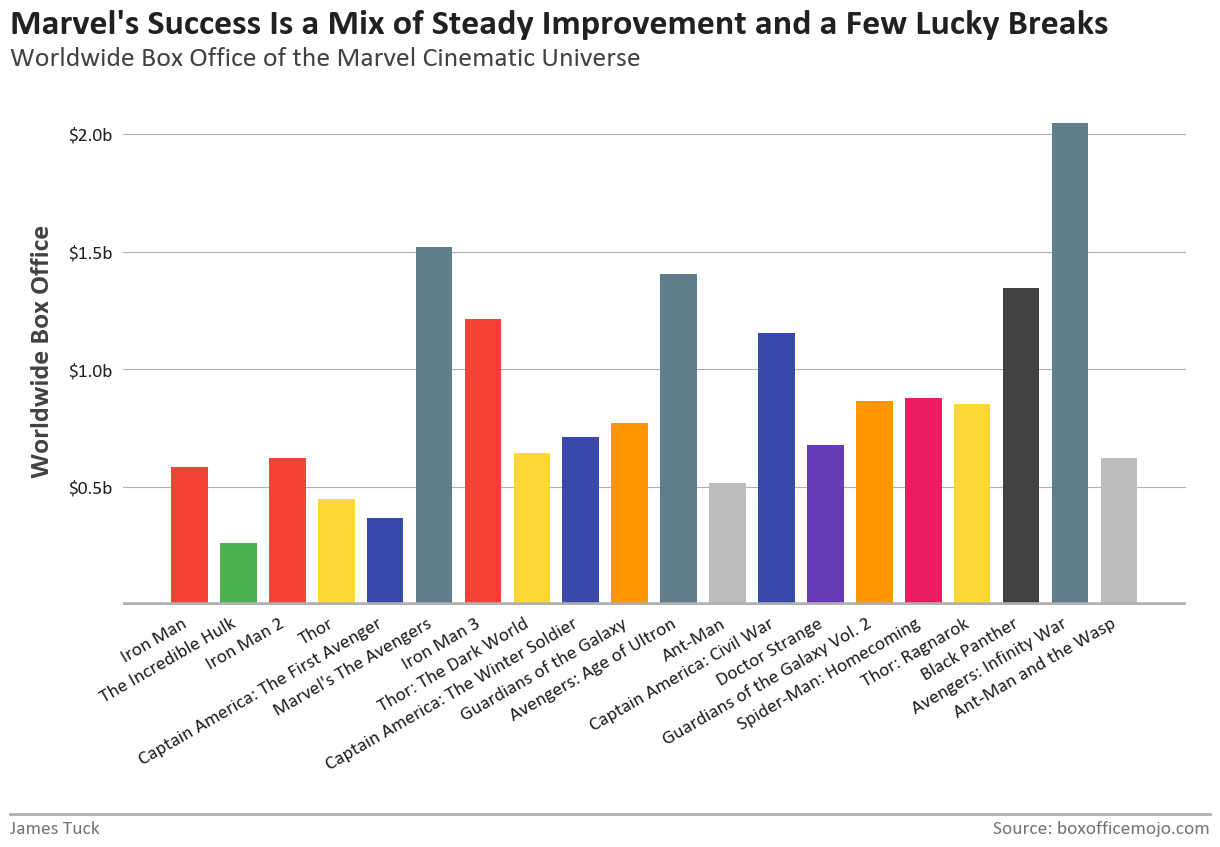

In [22]:
#Set up figure
fig = plt.figure(figsize = (12,8)) 
ax = fig.add_subplot(1,1,1)

#Plot chart
plt.bar(df['film'], df['total_box_office']/1000000000,color=df['color'],width=0.75)
#plt.xlabel('Film', size=20, weight='bold',color='#424242')
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right')
plt.ylabel('Worldwide Box Office', size=20, weight='bold',color='#424242')

#Adjust axis label formats
ax.set_yticks(np.linspace(0.5,2,4))
ax.axhline(y = 0, color = plt.rcParams['axes.edgecolor'], linewidth = 4)
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.1f}b')) 

#Plot title and signature
my_title(title='Marvel\'s Success Is a Mix of Steady Improvement and a Few Lucky Breaks'
    , subtitle='Worldwide Box Office of the Marvel Cinematic Universe')
my_signature(source='boxofficemojo.com')
plt.tight_layout(rect=[0,0.05,1,0.95])

#Export/Display Chart (Remember to check save_charts setting)
save_chart('01. Box Offices')
plt.show()

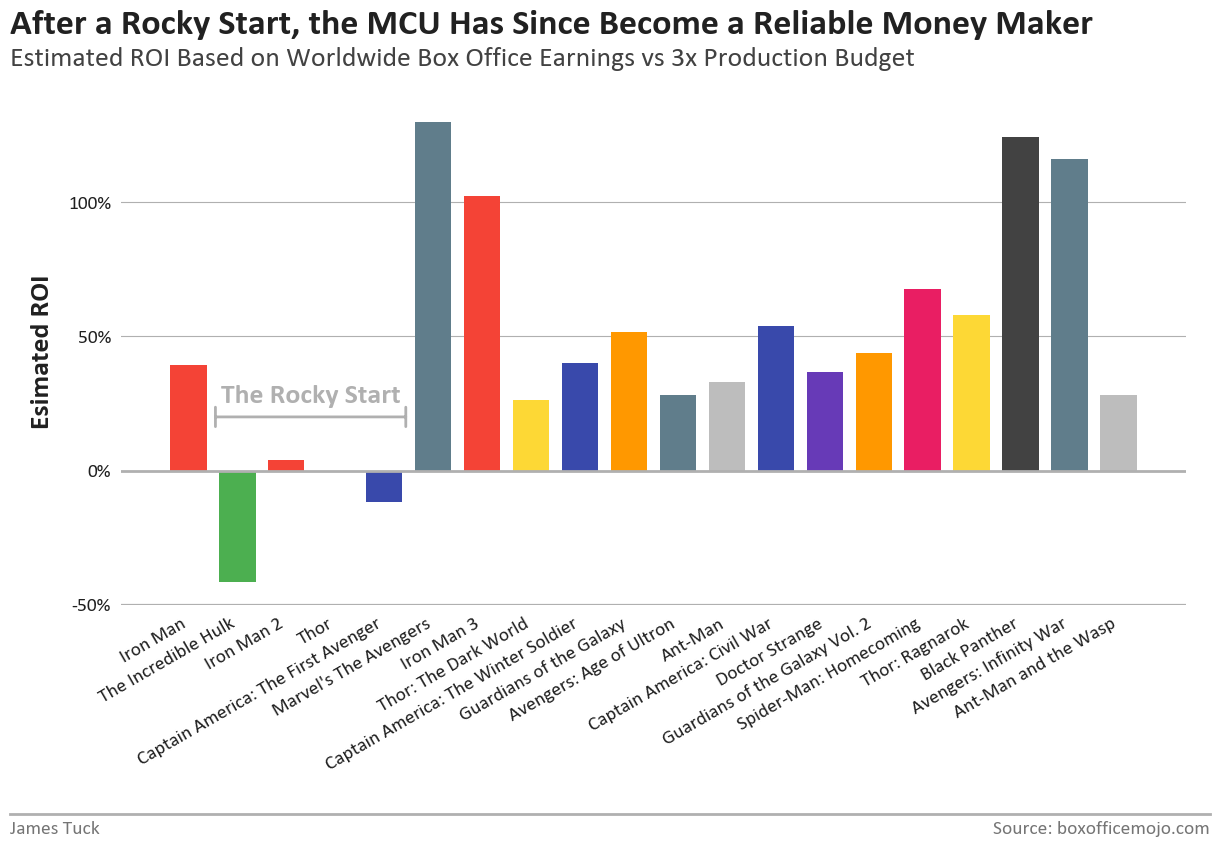

In [23]:
#Set up figure
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1)



#Plot chart
plt.bar(df['film'], df['roi'],color=df['color'],width=0.75)
#plt.xlabel('Film', size=20, weight='bold',color='#424242')
fig.autofmt_xdate(bottom=0.2, rotation=30, ha='right')
plt.ylabel('Esimated ROI', size=20, weight='bold')

ax.annotate('The Rocky Start', xy=(2.5, 25), xycoords='data', ha='center',fontsize=20
            ,xytext=(0,0), textcoords='offset points'
            , color=plt.rcParams['axes.edgecolor'], weight='bold',backgroundcolor='w')
ax.annotate("",xy=(0.5,20), xycoords='data', xytext=(4.5,20), textcoords='data',
            arrowprops=dict(arrowstyle='|-|,widthA=0.5,widthB=0.5', connectionstyle="arc3"
            , color=plt.rcParams['axes.edgecolor'], lw=2)
            )

        
#Adjust axis label formats
ax.axhline(y = 0, color=plt.rcParams['axes.edgecolor'], linewidth = 2) #normally only half of the axis shows
ax.set_yticks(np.linspace(-50,100,4))
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}%')) 
ax.axhline(y = -50, color=plt.rcParams['axes.edgecolor'], linewidth = 1.6) #normally only half of the axis shows

#Plot title and signature
my_title(title='After a Rocky Start, the MCU Has Since Become a Reliable Money Maker'
    , subtitle='Estimated ROI Based on Worldwide Box Office Earnings vs 3x Production Budget')
my_signature(source='boxofficemojo.com')
plt.tight_layout(rect=[0,0.05,1,0.95])

#Export/Display Chart (Remember to check save_charts setting)
save_chart('02. Estimated ROI')
plt.show()

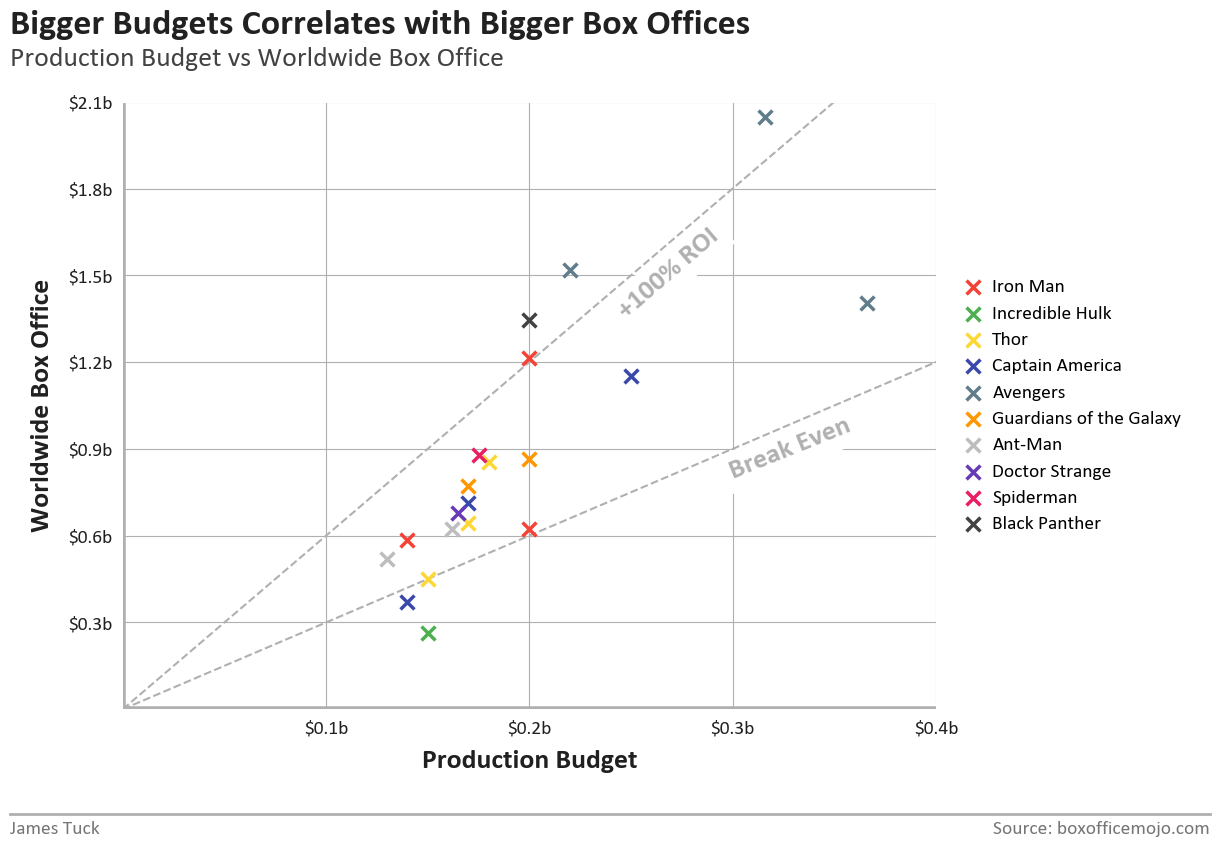

In [24]:
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1)

#Plot Break Even ROI line
ax.plot([0, 0.5], [0, 1.5], 'k-', zorder=0, linestyle='--', color='#b0b0b0')
ax.text(x = 0.3, y = 0.795, s = 'Break Even'
        , color=plt.rcParams['axes.edgecolor'], weight = 'bold'
        , rotation=22, rotation_mode='anchor', backgroundcolor = 'w', size='20')

#Double Your Money
ax.plot([0, 0.5], [0, 3], 'k-', zorder=0, linestyle='--', color='#b0b0b0')
ax.text(x = 0.2475, y = 1.35, s = '+100% ROI'
        , color=plt.rcParams['axes.edgecolor'], weight = 'bold'
        , rotation=40.75, rotation_mode='anchor', backgroundcolor = 'w', size='20')

#Plot Chart
for x in df['hero'].drop_duplicates():
    plt.scatter(df.loc[df['hero'] == x]['budget']/1000000000
                , df.loc[df['hero'] == x]['total_box_office']/1000000000
             , label= x
             , color=df.loc[df['hero'] == x]['color'].max()
             , marker='x', s=100, linewidth=2.5
            )
plt.xlabel('Production Budget', size=20, weight='bold')
plt.ylabel('Worldwide Box Office', size=20, weight='bold')



#Adjust axis label formats
ax.set_xlim([0,0.4])
ax.set_ylim([0,2.1])
ax.set_xticks(np.linspace(0.1,0.4,4))
ax.set_yticks(np.linspace(0.3,2.1,7))
ax.grid(color='#b0b0b0', linestyle='-', linewidth=0.8,axis='both')
ax.axhline(y = 0, color=plt.rcParams['axes.edgecolor'], linewidth = 4)
ax.axvline(x = 0, color=plt.rcParams['axes.edgecolor'], linewidth = 4)
ax.axhline(y = 2.1, color = 'w', linewidth = 0.8)
ax.xaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.1f}b')) 
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.1f}b')) 

#PLot Legend
lgnd = plt.legend(handletextpad=0, loc='center left', bbox_to_anchor=(1,0.5),facecolor='none',edgecolor = 'none')
    
#Plot title and signature
my_title(title='Bigger Budgets Correlates with Bigger Box Offices'
    , subtitle='Production Budget vs Worldwide Box Office'
        )
my_signature(source='boxofficemojo.com')
plt.tight_layout(rect=[0,0.05,1,0.95])

#Export/Display Chart (Remember to check save_charts setting)
save_chart('02a. Budgets vs Box Offices')
plt.show()

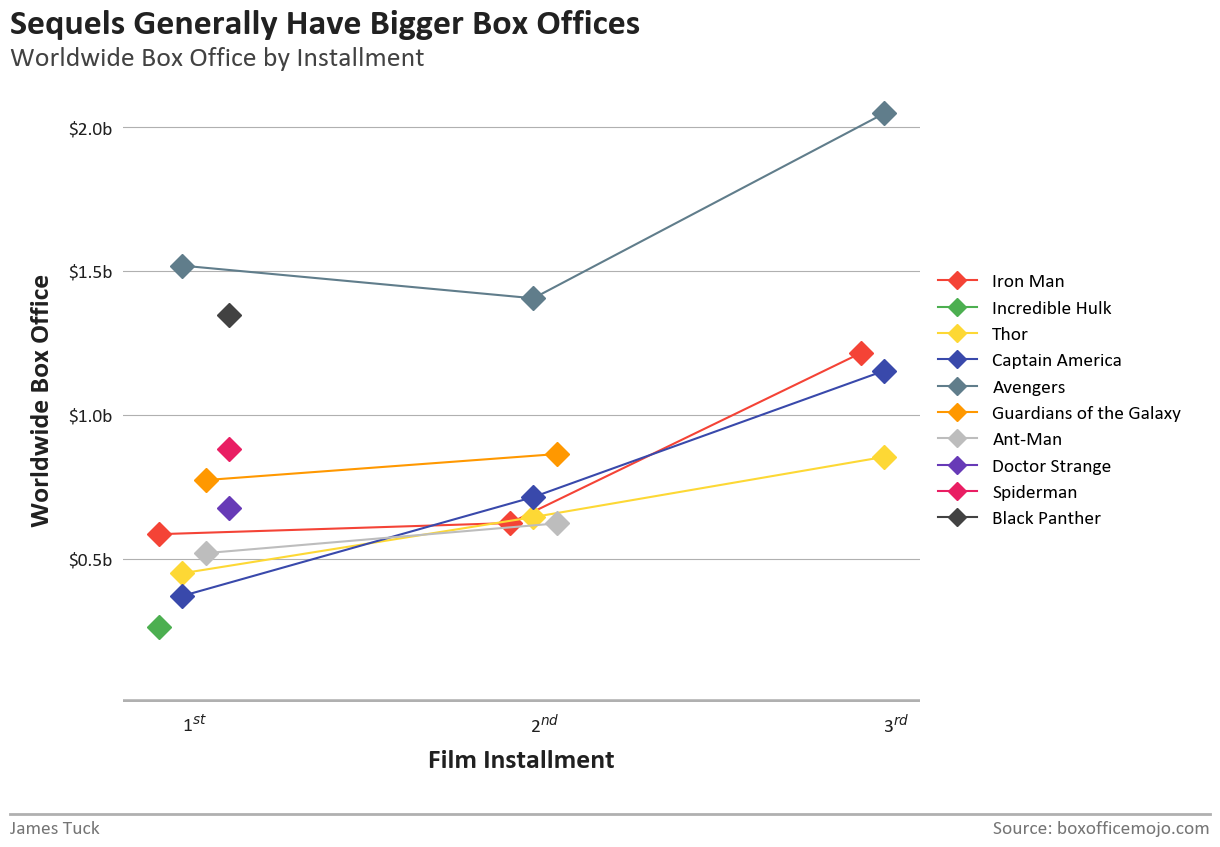

In [25]:
#Set up figure
fig = plt.figure(figsize = (12,8))
ax = fig.add_subplot(1,1,1)

#Scatterplot x-axis position adjustments
df.loc[ ((df.hero == 'Iron Man') | (df.hero == 'Incredible Hulk')), 'scatter_adjust' ] = -0.1
df.loc[ ((df.hero == 'Thor') | (df.hero == 'Captain America') | (df.hero == 'Avengers')), 'scatter_adjust' ] = -0.0333
df.loc[ ((df.hero == 'Guardians of the Galaxy') | (df.hero == 'Ant-Man')), 'scatter_adjust' ] = 0.0333
df.loc[ ((df.hero == 'Doctor Strange') | (df.hero == 'Spiderman') | (df.hero == 'Black Panther')), 'scatter_adjust' ] = 0.1

#Plot Chart
for x in df['hero'].drop_duplicates():
    plt.plot(df.loc[df['hero'] == x]['sequel']+df.loc[df['hero'] == x]['scatter_adjust'], df.loc[df['hero'] == x]['total_box_office']/1000000000
             , label= x, color=df.loc[df['hero'] == x]['color'].max()
             , marker='D', markersize=12, alpha=1
            )
plt.xlabel('Film Installment', size=20, weight='bold')
plt.ylabel('Worldwide Box Office', size=20, weight='bold')
ax.tick_params(axis = 'both', which = 'major', labelsize = 14, color='black')

#Adjust axis label formats
ax.axhline(y = 0, color=plt.rcParams['axes.edgecolor'], linewidth = 4)
ax.set_xticks([1,2,3])
ax.set_xticklabels(['1$^{st}$','2$^{nd}$','3$^{rd}$'])
ax.set_ylim(bottom=0, top=2.1)
ax.set_yticks([0.5,1.0,1.5,2.0])
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('${x:,.1f}b')) 
#ax.grid(color='#b0b0b0', linestyle='-', linewidth=0.8,axis='y')

#Plot Legend
plt.legend(loc='center left', fontsize=14, bbox_to_anchor=(1,0.5), facecolor='none',edgecolor = 'none', markerscale=0.75)

#Plot title and signature
my_title(title='Sequels Generally Have Bigger Box Offices', subtitle='Worldwide Box Office by Installment'
        )
my_signature(source='boxofficemojo.com')
plt.tight_layout(rect=[0,0.05,1,0.95])

#Export/Display Chart (Remember to check save_charts setting)
save_chart('03. Sequels')
plt.show()

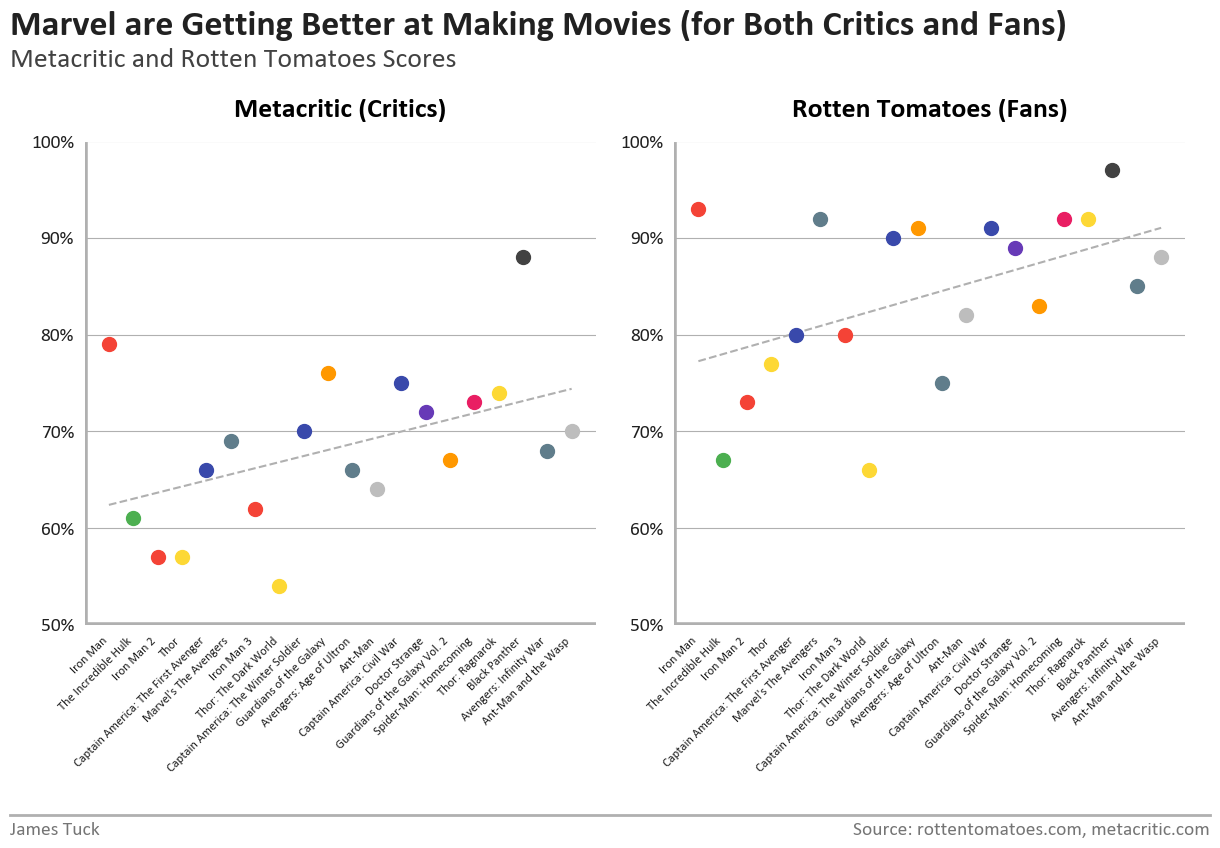

In [26]:
fig = plt.figure(figsize = (12,8))

#Plot Chart
ax = fig.add_subplot(1,2,1)
for x in df['hero'].drop_duplicates():
    plt.scatter(df.loc[df['hero'] == x]['series'], df.loc[df['hero'] == x]['metacritic']
             , label= x
             , color=df.loc[df['hero'] == x]['color'].max()
             , marker='o', s= 100 #df.loc[df['hero'] == x]['total_box_office']/2000000
            )
ax.set_xticks(df['series'])
ax.set_xticklabels(df['film'])
fig.autofmt_xdate(bottom=0.2, rotation=45, ha='right')
ax.set_xticklabels(df['film'],fontsize=9)

#Adjust axis label formats
ax.tick_params(axis = 'left', which = 'major', labelsize = 14, color='black')
ax.tick_params(axis = 'bottom', which = 'major', labelsize = 9, color='black')
ax.set_xlim([0,21])
ax.set_ylim([50,100])
ax.set_yticks([50,60,70,80,90,100])
ax.set_facecolor('white')
ax.grid(color='#b0b0b0', linestyle='-', linewidth=0.8,axis='y')
ax.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}%')) 
ax.axhline(y = 50, color=plt.rcParams['axes.edgecolor'], linewidth = 4)
ax.axvline(x = 0, color=plt.rcParams['axes.edgecolor'], linewidth = 4)
ax.axhline(y = 100, color = 'w', linewidth = 0.8)

plt.plot(np.unique(df['series'])
         , np.poly1d(np.polyfit(df['series'], df['metacritic'], 1))(np.unique(df['series']))
         , zorder=0, linestyle='--', color='#b0b0b0'
        )

ax.text(x = 0.5, y = 1.05
         , s = 'Metacritic (Critics)', horizontalalignment='center'
         , fontsize = 20, weight = 'bold', transform=ax.transAxes, color='black')

#Plot Chart
ax2 = fig.add_subplot(1,2,2)
for x in df['hero'].drop_duplicates():
    plt.scatter(df.loc[df['hero'] == x]['series'], df.loc[df['hero'] == x]['rotten_tomatoes']
             , label= x
             , color=df.loc[df['hero'] == x]['color'].max()
             , marker='o', s=100 #df.loc[df['hero'] == x]['total_box_office']/2000000
            )
ax2.set_xticks(df['series'])
ax2.set_xticklabels(df['film'])
fig.autofmt_xdate(bottom=0.2, rotation=45, ha='right')
ax2.set_xticklabels(df['film'],fontsize=9)

#plt.ylabel('Rotten Tomatoes Score', size=20, weight='bold')
ax2.text(x = 0.5, y = 1.05
         , s = 'Rotten Tomatoes (Fans)', horizontalalignment='center'
         , fontsize = 20, weight = 'bold', transform=ax2.transAxes, color='black')


#Adjust axis label formats
ax2.tick_params(axis = 'left', which = 'major', labelsize = 14, color='black')
ax2.tick_params(axis = 'bottom', which = 'major', labelsize = 9, color='black')
ax2.set_xlim([0,21])
ax2.set_ylim([50,100])
ax2.set_yticks([50,60,70,80,90,100])
ax2.set_facecolor('white')
ax2.grid(color='#b0b0b0', linestyle='-', linewidth=0.8,axis='y')
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}%')) 
ax2.axhline(y = 50, color=plt.rcParams['axes.edgecolor'], linewidth = 4)
ax2.axvline(x = 0, color=plt.rcParams['axes.edgecolor'], linewidth = 4)
ax2.axhline(y = 100, color = 'w', linewidth = 0.8)


plt.plot(np.unique(df['series'])
         , np.poly1d(np.polyfit(df['series'], df['rotten_tomatoes'], 1))(np.unique(df['series']))
         , zorder=0, linestyle='--', color='#b0b0b0'
        )



#PLot Legend
#lgnd = plt.legend(handletextpad=0, loc='center left', bbox_to_anchor=(1,0.5),facecolor='none',edgecolor = 'none')
#for handle in lgnd.legendHandles:
#    handle.set_sizes([110.0])
    
#Plot title and signature
my_title(title='Marvel are Getting Better at Making Movies (for Both Critics and Fans)'
    , subtitle='Metacritic and Rotten Tomatoes Scores'#. Marker size based on Box Office'
        )
my_signature(source='rottentomatoes.com, metacritic.com')
plt.tight_layout(rect=[0,0.05,1,0.95])

#Export/Display Chart (Remember to check save_charts setting)
save_chart('04. Metacritic Improvement')
plt.show()